Библиотеки

In [49]:
import numpy as np
from typing import List
import matplotlib.pyplot as plt
import matplotlib.animation as animation

Константы

In [50]:
L = 10 #размер сетки
n = L * L
T = 32 #время

Создание кластера и первой заполненной точки

In [51]:
cluster = np.zeros((L, L))
x = np.random.randint(L)
y = np.random.randint(L)
cluster[x, y] = 1
print(cluster)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Поиск соседей

In [52]:
def get_neighbors(x, y) -> List[tuple]:
    neighbors = []
    for x_ in range(max(0, x - 1), min(L, x + 2)):
        for y_ in range(max(0, y - 1), min(L, y + 2)):
            if (x, y) != (x_, y_) and cluster[x_, y_] != 1:                
                neighbors.append((x_, y_))
    return neighbors

cluster_border = get_neighbors(x, y)

Функция для заливки новой рандомной точки из границы

In [53]:
def fill_random_border_point():
    if cluster_border is not None:
        index = np.random.randint(len(cluster_border))
        x, y = cluster_border[index]
        cluster_border[index] = cluster_border[-1]
        cluster_border.pop()
        cluster[x, y] = 1
        for node in get_neighbors(x, y):
            if node not in cluster_border:
                cluster_border.append(node)

Непосредственно сам процесс

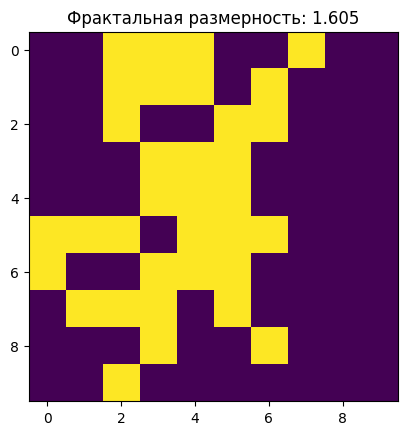

In [54]:
fig, ax = plt.subplots()
im = ax.imshow(cluster, cmap='viridis')
ax.set_title(f"Фрактальная размерность: {np.log(np.count_nonzero(cluster)) / np.log(L):.3f}")

def update(*args):
    a, b = np.where(cluster != 0)
    L1 = np.max([np.max(a) - np.min(a), np.max(b) - np.min(b)])
    dim = 0
    if L1 > 1:
        dim = np.log(np.count_nonzero(cluster)) / np.log(L1)
    ax.set_title(f"Фрактальная размерность: {dim:.3f}")
    im.set_array(cluster)
    fill_random_border_point()    
    return im,

anim = animation.FuncAnimation(fig, update, frames=T)
writergif = animation.PillowWriter(fps=60) 
anim.save("animation.gif", writer=writergif)